# **라이브러리 불러오기**

In [299]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

In [300]:
train=pd.read_csv('../Data/train.csv')
test=pd.read_csv('../Data/test.csv')
submission=pd.read_csv('../Data/sample_submission.csv')

# **[데이터 살펴보기]**

In [301]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [302]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [303]:
train.shape

(26457, 20)

In [304]:
test.shape

(10000, 19)

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리**

## **1. 결측치 제거** 

In [306]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [307]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [308]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [309]:
train['occyp_type'] = train['occyp_type'].replace(['Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], 1)

In [310]:
test['occyp_type'] = test['occyp_type'].replace(['Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], 1)

In [311]:
train['occyp_type']=train['occyp_type'].fillna(0)
test['occyp_type']=test['occyp_type'].fillna(0)

## **2. Binary variables**

In [312]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


## **3. Continuous variable**

### (1) child_num

In [313]:
train['comu'] = train['email'] + train['work_phone'] + train['phone']
test['comu'] = test['email'] + test['work_phone'] + test['phone']

In [315]:
train['comu'].value_counts()

0    14542
1     7962
2     3675
3      278
Name: comu, dtype: int64

In [316]:
test['comu'].value_counts()

0    5502
1    2984
2    1431
3      83
Name: comu, dtype: int64

In [317]:
train['comu'] = train['comu'].replace([2,3],1)
test['comu'] = test['comu'].replace([2,3],1)

<AxesSubplot:>

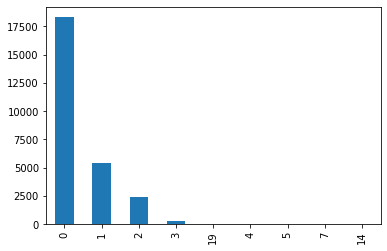

In [318]:
train['child_num'].value_counts(sort=False).plot.bar()

In [319]:
train.loc[train['child_num'] >= 1,'child_num']=1
test.loc[test['child_num']>=1, 'child_num']=1

### (2) inc

(2.544, 18.18]      16212
(18.18, 33.66]       8330
(33.66, 49.14]       1530
(49.14, 64.62]        206
(64.62, 80.1]         121
(80.1, 95.58]          44
(95.58, 111.06]         3
(111.06, 126.54]        2
(126.54, 142.02]        4
(142.02, 157.5]         5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

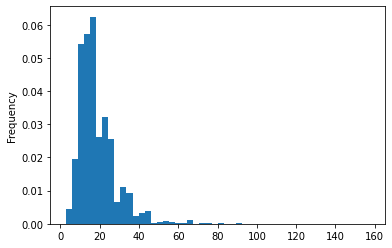

In [320]:
train['income_total'] = train['income_total'].astype(object)
train['income_total'] = train['income_total']/10000 
test['income_total'] = test['income_total']/10000
##############################################################3
print(train['income_total'].value_counts(bins=10,sort=False))
train['income_total'].plot(kind='hist',bins=50,density=True)

In [321]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7)]
#bin_dividers는 train기준!!
train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

In [322]:
train['income_total'].value_counts()

소득0    21601
소득1     4462
소득2      305
소득3       71
소득4        9
소득6        5
소득5        4
Name: income_total, dtype: int64

In [323]:
test['income_total'].value_counts()

소득0    8251
소득1    1609
소득2     108
소득3      25
소득6       3
소득4       2
소득5       2
Name: income_total, dtype: int64

In [324]:
test['income_total'] = test['income_total'].replace(['소득4', '소득5', '소득6'], '소득3')
train['income_total'] = train['income_total'].replace(['소득4', '소득5', '소득6'], '소득3')

In [325]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,comu
0,26457,1,1,0,0,소득0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,0.0,2.0,-60.0,1
1,26458,0,0,1,0,소득0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,1.0,2.0,-36.0,1
2,26459,0,0,1,0,소득0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,1.0,2.0,-40.0,1
3,26460,1,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,1.0,2.0,-41.0,1
4,26461,0,1,1,0,소득0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,1.0,2.0,-8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,소득0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,1.0,2.0,-19.0,1
9996,36453,1,1,1,0,소득0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,1.0,2.0,-34.0,1
9997,36454,0,0,1,0,소득1,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,1.0,2.0,-55.0,0
9998,36455,0,1,0,0,소득0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,0.0,2.0,-33.0,1


### **(3) Type**

In [326]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [327]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

## **4. Minus continuous variable**

In [328]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])

In [329]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'comu'],
      dtype='object')

In [330]:
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [331]:
train['DAYS_BIRTH'].unique()

array([3, 2, 6, 4, 5, 1, 8, 0, 7, 9])

In [332]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,comu
0,26457,1,1,0,0,0,1,4,0,1,8,0,1,0,1,0,0.0,2.0,3,1
1,26458,0,0,1,0,0,2,1,1,1,6,1,1,0,1,0,1.0,2.0,2,1
2,26459,0,0,1,0,0,4,4,1,1,4,1,1,1,1,0,1.0,2.0,2,1
3,26460,1,1,0,0,0,0,4,1,1,6,1,1,1,0,0,1.0,2.0,2,1
4,26461,0,1,1,0,0,2,1,1,1,5,1,1,1,0,0,1.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,6,1,1,1,1,0,1.0,2.0,1,1
9996,36453,1,1,1,0,0,4,4,0,1,1,1,1,1,0,0,1.0,2.0,2,1
9997,36454,0,0,1,0,1,4,4,1,1,7,1,1,0,0,0,1.0,2.0,3,0
9998,36455,0,1,0,0,0,0,4,1,1,5,1,1,0,1,0,0.0,2.0,2,1


In [333]:
train.shape

(26457, 21)

In [334]:
test.shape

(10000, 20)

# **[데이터 모델링]**

In [335]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [336]:
print(train_x.shape, train_y.shape, test.shape)

(26457, 20) (26457, 1) (10000, 20)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


rf_pred=RandomForestClassifier(n_estimators = 400, max_depth = 10)
rf_pred.fit(X_train, y_train)
y_pred=rf_pred.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

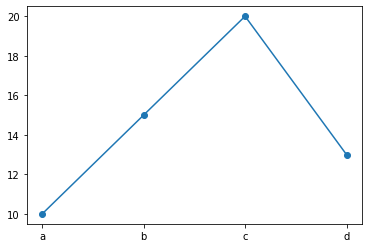

In [289]:
index = ['a','b','c','d']
num = [10,15,20,13]

plt.plot(index,num, marker = 'o')

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


ada_pred=AdaBoostClassifier()
ada_pred.fit(X_train, y_train)
y_pred=ada_pred.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 20)
(19842, 1)
Validation set: 
(6615, 20)
(6615, 1)
log_loss: 1.088754619806089


Train set: 
(19842, 20)
(19842, 1)
Validation set: 
(6615, 20)
(6615, 1)
learn_rate: 0.05 log_loss: 0.8616089300532583
learn_rate: 0.06 log_loss: 0.8613847098322538
learn_rate: 0.07 log_loss: 0.8614717287924668
learn_rate: 0.08 log_loss: 0.8613018276139027
learn_rate: 0.09 log_loss: 0.8614260465706602
learn_rate: 0.1 log_loss: 0.8611407425060751
learn_rate: 0.11 log_loss: 0.8614411706684283
learn_rate: 0.12 log_loss: 0.8623904148912866
learn_rate: 0.13 log_loss: 0.8615299315935804
learn_rate: 0.14 log_loss: 0.8613713151073484


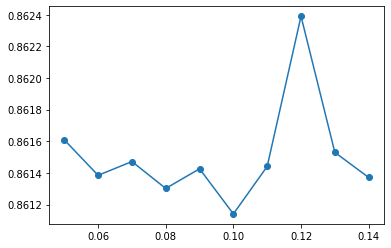

In [338]:

from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)

logloss_list = []
index = []
j = 0.05
for i in range(10):
    index.append(j)
    gb_pred=GradientBoostingClassifier(learning_rate = j)
    gb_pred.fit(X_train, y_train)
    y_pred=gb_pred.predict_proba(X_val)
    print(f"learn_rate: {round(j,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
    logloss_list.append(log_loss(to_categorical(y_val['credit']), y_pred))
    j += 0.01

plt.plot(index, logloss_list, marker ='o')


learn_rate: 0.05 log_loss: 0.8613366715120938
learn_rate: 0.06 log_loss: 0.8610881752494466
learn_rate: 0.07 log_loss: 0.8603584101009593
learn_rate: 0.08 log_loss: 0.8600821201632786
learn_rate: 0.09 log_loss: 0.859609409547585
learn_rate: 0.1 log_loss: 0.8591714885327657
learn_rate: 0.11 log_loss: 0.8590835689944324
learn_rate: 0.12 log_loss: 0.8587405486141977
learn_rate: 0.13 log_loss: 0.8596959390607678
learn_rate: 0.14 log_loss: 0.8593235605978687


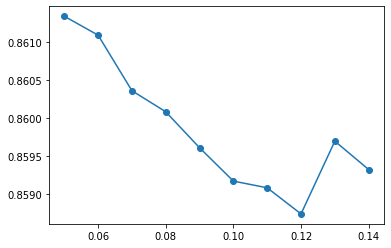

In [339]:
logloss_list = []
index = []
k = 0.05
for i in range(10):
    index.append(k)
    gb_pred=GradientBoostingClassifier(learning_rate = k, 
                                       max_features = 'log2')
    gb_pred.fit(X_train, y_train)
    y_pred=gb_pred.predict_proba(X_val)
    print(f"learn_rate: {round(k,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
    logloss_list.append(log_loss(to_categorical(y_val['credit']), y_pred))
    k += 0.01

plt.plot(index, logloss_list, marker ='o')
# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.
# 분산 감소, 편향 증가

# GB

The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

In [340]:
logloss_list = []
index = []
k = 0.05
for i in range(10):
    index.append(k)
    gb_pred=GradientBoostingClassifier(learning_rate = k, 
                                       max_features = 'log2',
                                       n_estimators = 400)
    gb_pred.fit(X_train, y_train)
    y_pred=gb_pred.predict_proba(X_val)
    print(f"learn_rate: {round(k,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
    logloss_list.append(log_loss(to_categorical(y_val['credit']), y_pred))
    k += 0.01

plt.plot(index, logloss_list, marker ='o')

learn_rate: 0.05 log_loss: 0.8574791443879539
learn_rate: 0.06 log_loss: 0.857828858190959
learn_rate: 0.07 log_loss: 0.8572947791097775
learn_rate: 0.08 log_loss: 0.8583003963118919


KeyboardInterrupt: 

n_estimators: 100 log_loss: 0.8599662287806312
n_estimators: 200 log_loss: 0.8587529578704328
n_estimators: 300 log_loss: 0.8587605265188634
n_estimators: 400 log_loss: 0.8596533277967818
n_estimators: 500 log_loss: 0.8581248042814624
n_estimators: 600 log_loss: 0.8597715661593509
n_estimators: 700 log_loss: 0.8591506016229358
n_estimators: 800 log_loss: 0.8593948859900781
n_estimators: 900 log_loss: 0.8594987545619592
n_estimators: 1000 log_loss: 0.8612389561953235


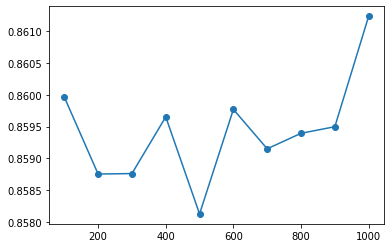

In [118]:
logloss_list = []
index = []
k = 100
for i in range(10):
    index.append(k)
    gb_pred=GradientBoostingClassifier(learning_rate = 0.09,
                                       max_features = 'log2',
                                       n_estimators = k)
    gb_pred.fit(X_train, y_train)
    y_pred=gb_pred.predict_proba(X_val)
    print(f"n_estimators: {round(k,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
    logloss_list.append(log_loss(to_categorical(y_val['credit']), y_pred))
    k += 100

plt.plot(index, logloss_list, marker ='o')

In [161]:
len(train_x.columns)

18

In [ ]:
max_features = 18

In [168]:
X_train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month'],
      dtype='object')

n_estimators: 0.09 log_loss: 0.8515020605922209
n_estimators: 0.1 log_loss: 0.8516053800930816
n_estimators: 0.11 log_loss: 0.8513152265429788
n_estimators: 0.12 log_loss: 0.8511360092334687
n_estimators: 0.13 log_loss: 0.8523916098005562
n_estimators: 0.14 log_loss: 0.8513200393278879
n_estimators: 0.15 log_loss: 0.8514545706982998
n_estimators: 0.16 log_loss: 0.8514020362201272
n_estimators: 0.17 log_loss: 0.8523422590691301
n_estimators: 0.18 log_loss: 0.8535253149334672


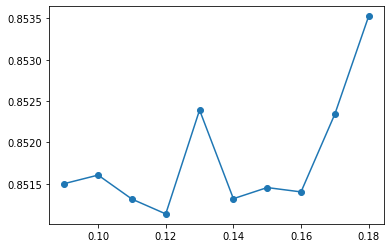

In [342]:
logloss_list = []
index = []
k = 0.09
for i in range(10):
    index.append(k)
    gb_pred=GradientBoostingClassifier(learning_rate = k,
                                       max_features = 'log2',
                                       n_estimators = 500,
                                       random_state = 2021,
                                       subsample= 0.5)
    gb_pred.fit(X_train.drop(['index','FLAG_MOBIL'], axis = 1), y_train)
    y_pred=gb_pred.predict_proba(X_val.drop(['index','FLAG_MOBIL'], axis = 1))
    print(f"n_estimators: {round(k,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
    logloss_list.append(log_loss(to_categorical(y_val['credit']), y_pred))
    k += 0.01

plt.plot(index, logloss_list, marker ='o')

n_estimators: 0.18 log_loss: 0.8495805176821887
n_estimators: 0.19 log_loss: 0.8494964307075415
n_estimators: 0.2 log_loss: 0.850964543973851
n_estimators: 0.21 log_loss: 0.8493782436057378
n_estimators: 0.22 log_loss: 0.8492698137870853
n_estimators: 0.23 log_loss: 0.8498137289513051
n_estimators: 0.24 log_loss: 0.8499648243993339
n_estimators: 0.25 log_loss: 0.850243145907293
n_estimators: 0.26 log_loss: 0.848156990902261
n_estimators: 0.27 log_loss: 0.8509282006334343


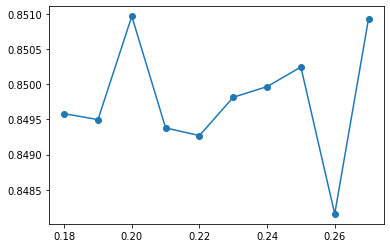

In [343]:
logloss_list = []
index = []
k = 0.18
for i in range(10):
    index.append(k)
    gb_pred=GradientBoostingClassifier(learning_rate = k, 
                                       n_estimators = 200, 
                                       random_state = 2021,
                                       subsample = 0.9)
    gb_pred.fit(X_train.drop(['index'], axis = 1), y_train)
    y_pred=gb_pred.predict_proba(X_val.drop(['index'], axis = 1))
    print(f"n_estimators: {round(k,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")
    logloss_list.append(log_loss(to_categorical(y_val['credit']), y_pred))
    k += 0.01

plt.plot(index, logloss_list, marker ='o')

In [298]:

gb_pred=GradientBoostingClassifier(learning_rate = 0.11,
                                    n_estimators = 500)
gb_pred.fit(X_train.drop(['index'], axis = 1), y_train)
y_pred=gb_pred.predict_proba(X_val.drop(['index'], axis = 1))
print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

log_loss: 0.8516526544564288


In [246]:
feat_importances = pd.Series(gb_pred.feature_importances_ , index= X_train.drop(['index'], axis = 1).columns)

<AxesSubplot:>

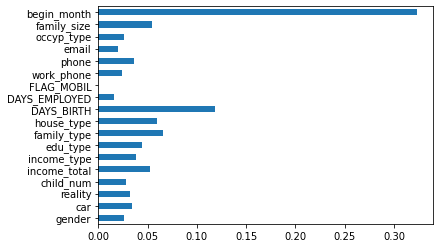

In [247]:
feat_importances.plot(kind = 'barh')

In [295]:
X_train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month'],
      dtype='object')

# CAT

In [296]:
cat_pred=CatBoostClassifier()
cat_pred.fit(X_train, y_train)

y_pred=cat_pred.predict_proba(X_val)
print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")




Learning rate set to 0.088986
0:	learn: 1.0582333	total: 39.7ms	remaining: 39.7s
1:	learn: 1.0255387	total: 49.2ms	remaining: 24.6s
2:	learn: 0.9988881	total: 56.5ms	remaining: 18.8s
3:	learn: 0.9783636	total: 63.3ms	remaining: 15.8s
4:	learn: 0.9598367	total: 78.3ms	remaining: 15.6s
5:	learn: 0.9448281	total: 84.6ms	remaining: 14s
6:	learn: 0.9315806	total: 90ms	remaining: 12.8s
7:	learn: 0.9202765	total: 95.4ms	remaining: 11.8s
8:	learn: 0.9108393	total: 101ms	remaining: 11.1s
9:	learn: 0.9034978	total: 106ms	remaining: 10.5s
10:	learn: 0.8965987	total: 111ms	remaining: 9.96s
11:	learn: 0.8909719	total: 120ms	remaining: 9.89s
12:	learn: 0.8859432	total: 125ms	remaining: 9.45s
13:	learn: 0.8823251	total: 127ms	remaining: 8.97s
14:	learn: 0.8784810	total: 137ms	remaining: 8.97s
15:	learn: 0.8752213	total: 142ms	remaining: 8.75s
16:	learn: 0.8722687	total: 148ms	remaining: 8.55s
17:	learn: 0.8697934	total: 168ms	remaining: 9.19s
18:	learn: 0.8677379	total: 175ms	remaining: 9.04s
19:	lea

In [104]:
train_x.shape

(26457, 18)

In [108]:
import math

In [103]:
gb_pred.max_features_

18

In [351]:
gb_pred=GradientBoostingClassifier(learning_rate = 0.1, 
                                    n_estimators = 200, 
                                    random_state = 2021,
                                    subsample = 0.9)
gb_pred.fit(X_train.drop(['index'], axis = 1), y_train)
y_pred=gb_pred.predict_proba(X_val.drop(['index'], axis = 1))
print(f"n_estimators: {round(k,2)} log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

n_estimators: 0.28 log_loss: 0.8519534022337523


In [ ]:
ada_pred

In [352]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(gb_pred):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        gb_pred.fit(X_train, y_train)
        
        predictions=gb_pred.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=gb_pred.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(gb_pred)

FOLD 0 : logloss:0.8662966746899975
FOLD 1 : logloss:0.8604469776324857
FOLD 2 : logloss:0.8606086427696085
FOLD 3 : logloss:0.8625075784076022
FOLD 4 : logloss:0.861026550691986
Mean:0.8621772848383358


In [349]:
my_submission

array([[0.03294048, 0.20923338, 0.75782614],
       [0.04742009, 0.13653776, 0.81604215],
       [0.04051205, 0.32259924, 0.63688871],
       ...,
       [0.02568598, 0.09441997, 0.87989406],
       [0.15605573, 0.18395192, 0.65999235],
       [0.02489386, 0.22997014, 0.74513599]])

In [74]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [75]:
submission.loc[:,1:]=my_submission

In [76]:
submission

,index,0,1,2
0,26457,0.113594,0.224625,0.661781
1,26458,0.109723,0.203947,0.686330
2,26459,0.100357,0.248678,0.650966
3,26460,0.137978,0.222263,0.639760
4,26461,0.144950,0.331380,0.523670
...,...,...,...,...
9995,36452,0.107431,0.272277,0.620293
9996,36453,0.087856,0.330018,0.582126
9997,36454,0.095876,0.202913,0.701211
9998,36455,0.126372,0.242632,0.630996


In [356]:
submission.to_csv('../Data/baseline_submission_6.csv', index=False)